In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_df=train_data[train_data.loc[:,'Time']<3]
val_df=train_data[train_data.loc[:,'Time']==3]

del train_data

In [2]:
def xgb_eval(train_df,val_df):
    train_df=train_df.copy()
    val_df=val_df.copy()

    try:
        from sklearn.preprocessing import LabelEncoder
        lb_encoder=LabelEncoder()
        lb_encoder.fit(train_df.loc[:,'RoomDir'].append(val_df.loc[:,'RoomDir']))
        train_df.loc[:,'RoomDir']=lb_encoder.transform(train_df.loc[:,'RoomDir'])
        val_df.loc[:,'RoomDir']=lb_encoder.transform(val_df.loc[:,'RoomDir'])
    except Exception as e:
        print(e)

    import xgboost as xgb
    X_train=train_df.drop(['Rental'],axis=1)
    Y_train=train_df.loc[:,'Rental'].values
    X_val=val_df.drop(['Rental'],axis=1)
    Y_val=val_df.loc[:,'Rental'].values

    from sklearn.metrics import mean_squared_error

    try:
        eval_df=val_df.copy().drop('Time',axis=1)
    except Exception as e:
        eval_df=val_df.copy()

    reg_model=xgb.XGBRegressor(max_depth=5,n_estimators=500,n_jobs=-1)
    reg_model.fit(X_train,Y_train)

    y_pred=reg_model.predict(X_val)
    print(np.sqrt(mean_squared_error(Y_val,y_pred)),end=' ')

    eval_df.loc[:,'Y_pred']=y_pred
    eval_df.loc[:,'RE']=eval_df.loc[:,'Y_pred']-eval_df.loc[:,'Rental']
    
    print('')
    feature=X_train.columns
    fe_im=reg_model.feature_importances_
    print(pd.DataFrame({'fe':feature,'im':fe_im}).sort_values(by='im',ascending=False))

    import matplotlib.pyplot as plt
    plt.clf()
    plt.figure(figsize=(15,4))
    plt.plot([Y_train.min(),Y_train.max()],[0,0],color='red')
    plt.scatter(x=eval_df.loc[:,'Rental'],y=eval_df.loc[:,'RE'])
    plt.show()

    return eval_df

## 减特征测试

drop col:TolHeight
'the label [RoomDir] is not in the [columns]'
2.403212098259608 
                  fe        im
1           RoomArea  0.178889
0       Neighborhood  0.116919
14         Area/Room  0.111851
25       BusLoc_rank  0.069065
15   AreaSumByHeight  0.062043
16  AreaMeanByHeight  0.059654
10         SubwayDis  0.051908
19          Rent_pct  0.050966
7             BusLoc  0.037067
18         ab_Height  0.026786
27    SubwaySta_rank  0.024759
12      RoomDir_rank  0.024108
9          SubwaySta  0.023456
13          TolRooms  0.023311
3            Bedroom  0.021501
6             Region  0.020560
4           Bathroom  0.017737
24       Region_rank  0.013610
8         SubwayLine  0.010642
11         RemodCond  0.010570
22   Livingroom_rank  0.010497
17           RoomStr  0.008905
2         RentStatus  0.006371
23     Bathroom_rank  0.005936
5           RentType  0.004489
21      Bedroom_rank  0.003113
20       Height_rank  0.003041
26   SubwayLine_rank  0.002244


<Figure size 432x288 with 0 Axes>

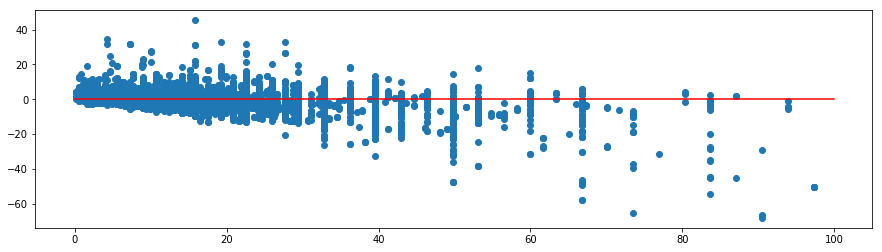

drop col:RentStatus
'the label [RoomDir] is not in the [columns]'
2.4032833539450835 
                  fe        im
2           RoomArea  0.170903
0       Neighborhood  0.120433
14         Area/Room  0.114356
25       BusLoc_rank  0.067961
1          TolHeight  0.060031
10         SubwayDis  0.050174
15   AreaSumByHeight  0.046098
19          Rent_pct  0.042615
16  AreaMeanByHeight  0.037723
7             BusLoc  0.037204
13          TolRooms  0.024754
12      RoomDir_rank  0.024087
9          SubwaySta  0.023271
3            Bedroom  0.022975
18         ab_Height  0.022901
27    SubwaySta_rank  0.021715
4           Bathroom  0.019566
6             Region  0.019121
24       Region_rank  0.013711
11         RemodCond  0.011043
22   Livingroom_rank  0.010079
17           RoomStr  0.009338
8         SubwayLine  0.008449
5           RentType  0.007115
23     Bathroom_rank  0.006077
20       Height_rank  0.003335
26   SubwayLine_rank  0.002594
21      Bedroom_rank  0.002372


<Figure size 432x288 with 0 Axes>

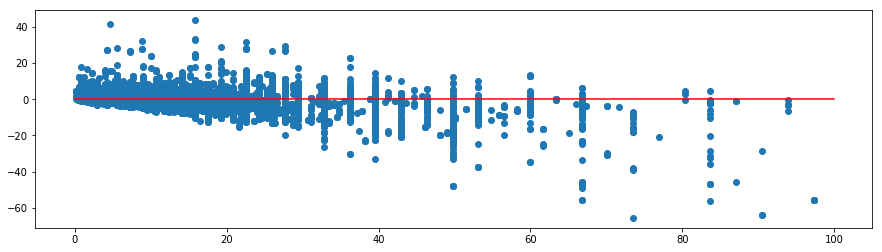

drop col:Bedroom
'the label [RoomDir] is not in the [columns]'
2.414488069936849 
                  fe        im
2           RoomArea  0.169644
0       Neighborhood  0.117452
14         Area/Room  0.112579
25       BusLoc_rank  0.066219
1          TolHeight  0.058615
19          Rent_pct  0.049756
10         SubwayDis  0.048944
16  AreaMeanByHeight  0.044958
15   AreaSumByHeight  0.043555
7             BusLoc  0.040012
13          TolRooms  0.025395
12      RoomDir_rank  0.025100
9          SubwaySta  0.024731
18         ab_Height  0.022073
27    SubwaySta_rank  0.020744
21      Bedroom_rank  0.019342
6             Region  0.017201
4           Bathroom  0.016979
24       Region_rank  0.013288
17           RoomStr  0.011147
22   Livingroom_rank  0.011073
8         SubwayLine  0.009597
11         RemodCond  0.009080
23     Bathroom_rank  0.006939
3         RentStatus  0.005389
5           RentType  0.004503
20       Height_rank  0.003322
26   SubwayLine_rank  0.002362


<Figure size 432x288 with 0 Axes>

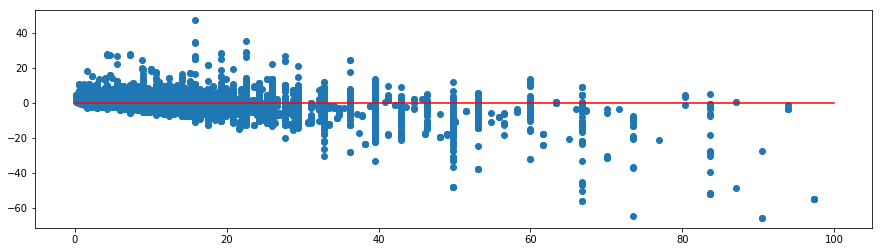

drop col:Bathroom
'the label [RoomDir] is not in the [columns]'
2.3900203983803654 
                  fe        im
2           RoomArea  0.168177
0       Neighborhood  0.117600
14         Area/Room  0.116577
25       BusLoc_rank  0.067680
1          TolHeight  0.056790
10         SubwayDis  0.050797
15   AreaSumByHeight  0.046192
19          Rent_pct  0.042684
16  AreaMeanByHeight  0.040126
7             BusLoc  0.039833
13          TolRooms  0.026093
12      RoomDir_rank  0.025946
18         ab_Height  0.024119
9          SubwaySta  0.023608
4            Bedroom  0.023461
27    SubwaySta_rank  0.021269
23     Bathroom_rank  0.018784
6             Region  0.018272
24       Region_rank  0.013302
11         RemodCond  0.010379
22   Livingroom_rank  0.010159
17           RoomStr  0.010086
8         SubwayLine  0.008844
3         RentStatus  0.006651
5           RentType  0.004824
20       Height_rank  0.003289
21      Bedroom_rank  0.002777
26   SubwayLine_rank  0.001681


<Figure size 432x288 with 0 Axes>

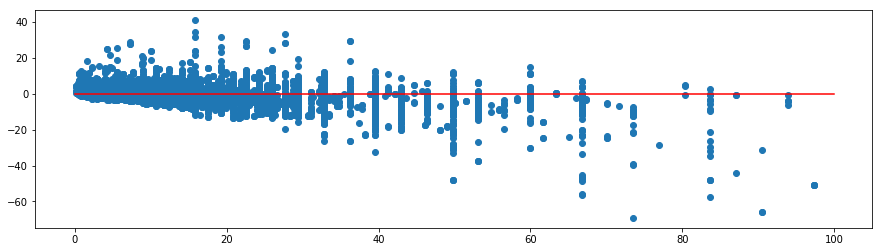

drop col:RentType
'the label [RoomDir] is not in the [columns]'
2.4006061689211387 
                  fe        im
2           RoomArea  0.171146
0       Neighborhood  0.120020
14         Area/Room  0.112738
25       BusLoc_rank  0.066128
1          TolHeight  0.056077
10         SubwayDis  0.050980
15   AreaSumByHeight  0.046027
19          Rent_pct  0.044644
16  AreaMeanByHeight  0.040929
7             BusLoc  0.037871
9          SubwaySta  0.024179
27    SubwaySta_rank  0.024106
18         ab_Height  0.023960
12      RoomDir_rank  0.021776
4            Bedroom  0.021557
13          TolRooms  0.020392
5           Bathroom  0.019154
6             Region  0.017260
24       Region_rank  0.015003
11         RemodCond  0.011871
22   Livingroom_rank  0.010487
17           RoomStr  0.010123
8         SubwayLine  0.009832
3         RentStatus  0.007064
23     Bathroom_rank  0.006700
21      Bedroom_rank  0.005025
20       Height_rank  0.002695
26   SubwayLine_rank  0.002258


<Figure size 432x288 with 0 Axes>

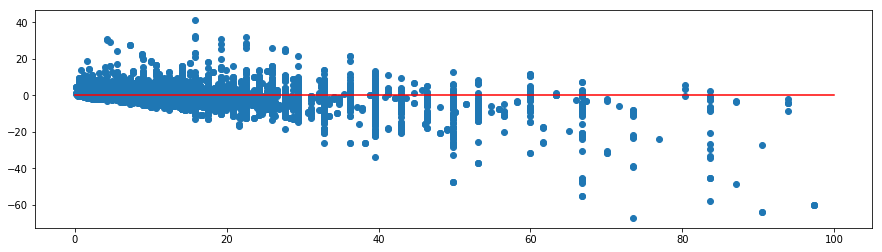

drop col:Region
'the label [RoomDir] is not in the [columns]'
2.415745503232032 
                  fe        im
2           RoomArea  0.175754
0       Neighborhood  0.118441
14         Area/Room  0.113965
25       BusLoc_rank  0.065385
1          TolHeight  0.061055
10         SubwayDis  0.051882
15   AreaSumByHeight  0.045571
19          Rent_pct  0.043957
16  AreaMeanByHeight  0.041462
7             BusLoc  0.040948
9          SubwaySta  0.026198
13          TolRooms  0.023116
12      RoomDir_rank  0.023042
18         ab_Height  0.022382
27    SubwaySta_rank  0.021795
4            Bedroom  0.021355
24       Region_rank  0.020181
5           Bathroom  0.017465
22   Livingroom_rank  0.010641
8         SubwayLine  0.009907
11         RemodCond  0.009467
17           RoomStr  0.009467
23     Bathroom_rank  0.006531
3         RentStatus  0.005651
21      Bedroom_rank  0.004256
6           RentType  0.004109
20       Height_rank  0.003669
26   SubwayLine_rank  0.002348


<Figure size 432x288 with 0 Axes>

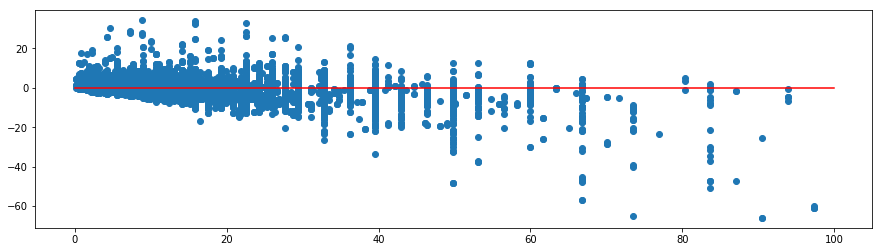

drop col:BusLoc
'the label [RoomDir] is not in the [columns]'
2.394675234544315 
                  fe        im
2           RoomArea  0.169537
0       Neighborhood  0.122302
14         Area/Room  0.114963
25       BusLoc_rank  0.076811
1          TolHeight  0.065112
10         SubwayDis  0.053775
19          Rent_pct  0.045273
16  AreaMeanByHeight  0.043674
15   AreaSumByHeight  0.043238
12      RoomDir_rank  0.026524
9          SubwaySta  0.026016
27    SubwaySta_rank  0.023835
13          TolRooms  0.022745
4            Bedroom  0.021655
18         ab_Height  0.021655
7             Region  0.019621
5           Bathroom  0.018749
24       Region_rank  0.017223
8         SubwayLine  0.010828
22   Livingroom_rank  0.010755
17           RoomStr  0.010174
11         RemodCond  0.010101
3         RentStatus  0.005596
23     Bathroom_rank  0.005378
6           RentType  0.004360
20       Height_rank  0.003851
21      Bedroom_rank  0.003270
26   SubwayLine_rank  0.002979


<Figure size 432x288 with 0 Axes>

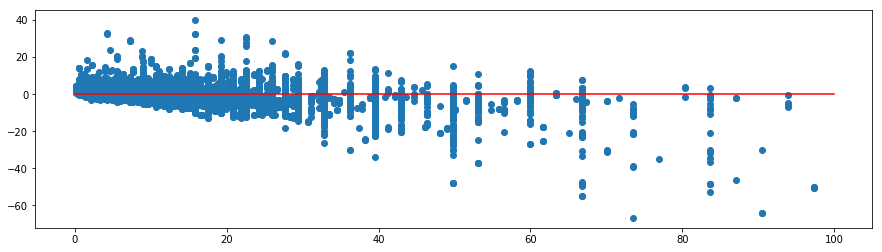

drop col:SubwayLine
'the label [RoomDir] is not in the [columns]'
2.394784391667037 
                  fe        im
2           RoomArea  0.174491
0       Neighborhood  0.118750
14         Area/Room  0.113009
25       BusLoc_rank  0.065116
1          TolHeight  0.058358
10         SubwayDis  0.050727
19          Rent_pct  0.046221
15   AreaSumByHeight  0.044549
8             BusLoc  0.039462
16  AreaMeanByHeight  0.039317
9          SubwaySta  0.027616
18         ab_Height  0.024491
12      RoomDir_rank  0.023983
13          TolRooms  0.023547
27    SubwaySta_rank  0.021584
4            Bedroom  0.021076
7             Region  0.017587
5           Bathroom  0.017297
24       Region_rank  0.014244
17           RoomStr  0.010247
22   Livingroom_rank  0.010102
11         RemodCond  0.009157
26   SubwayLine_rank  0.006395
3         RentStatus  0.006250
23     Bathroom_rank  0.005596
6           RentType  0.004433
20       Height_rank  0.004070
21      Bedroom_rank  0.002326


<Figure size 432x288 with 0 Axes>

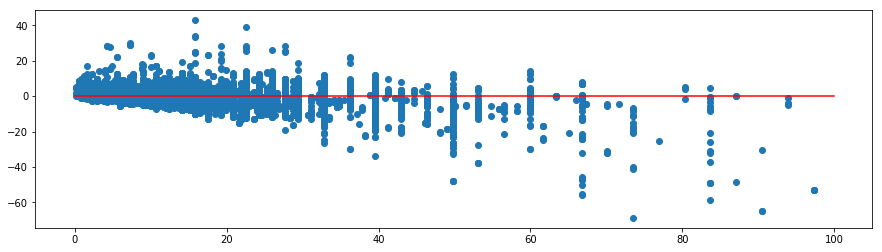

drop col:SubwaySta
'the label [RoomDir] is not in the [columns]'
2.3976674838130676 
                  fe        im
2           RoomArea  0.176535
0       Neighborhood  0.119504
14         Area/Room  0.115513
25       BusLoc_rank  0.066609
1          TolHeight  0.059208
10         SubwayDis  0.055072
19          Rent_pct  0.047381
15   AreaSumByHeight  0.046220
8             BusLoc  0.038746
16  AreaMeanByHeight  0.037585
27    SubwaySta_rank  0.028588
13          TolRooms  0.025033
4            Bedroom  0.023944
12      RoomDir_rank  0.022421
18         ab_Height  0.020969
7             Region  0.018285
5           Bathroom  0.015963
24       Region_rank  0.015382
22   Livingroom_rank  0.011972
9         SubwayLine  0.011174
11         RemodCond  0.009287
17           RoomStr  0.009215
23     Bathroom_rank  0.006748
3         RentStatus  0.006748
6           RentType  0.003918
21      Bedroom_rank  0.002975
20       Height_rank  0.002612
26   SubwayLine_rank  0.002394


<Figure size 432x288 with 0 Axes>

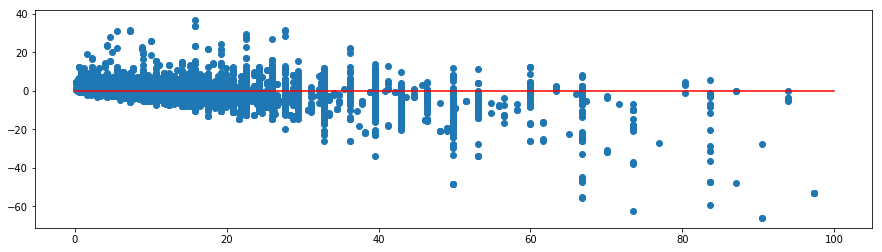

drop col:SubwayDis
'the label [RoomDir] is not in the [columns]'
2.42401286204177 
                  fe        im
2           RoomArea  0.178641
0       Neighborhood  0.127166
14         Area/Room  0.119626
25       BusLoc_rank  0.067281
1          TolHeight  0.060465
19          Rent_pct  0.048285
15   AreaSumByHeight  0.046255
16  AreaMeanByHeight  0.041543
8             BusLoc  0.038135
10         SubwaySta  0.029218
27    SubwaySta_rank  0.027405
18         ab_Height  0.026028
12      RoomDir_rank  0.024578
13          TolRooms  0.024360
4            Bedroom  0.021460
7             Region  0.018198
5           Bathroom  0.017545
24       Region_rank  0.015080
9         SubwayLine  0.012398
17           RoomStr  0.011528
22   Livingroom_rank  0.009715
11         RemodCond  0.009425
3         RentStatus  0.006453
23     Bathroom_rank  0.005728
20       Height_rank  0.004350
6           RentType  0.003915
26   SubwayLine_rank  0.002755
21      Bedroom_rank  0.002465


<Figure size 432x288 with 0 Axes>

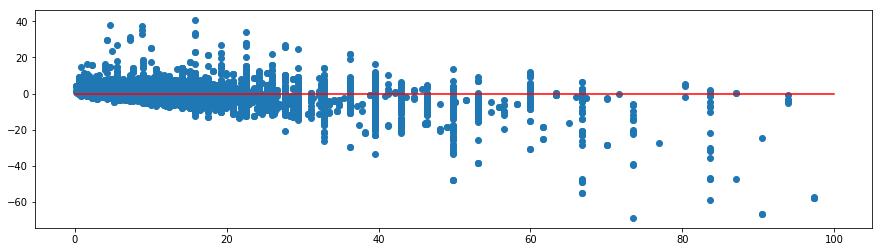

drop col:RemodCond
'the label [RoomDir] is not in the [columns]'
2.4193155304209597 
                  fe        im
2           RoomArea  0.175581
0       Neighborhood  0.116497
14         Area/Room  0.111919
25       BusLoc_rank  0.066279
1          TolHeight  0.059157
11         SubwayDis  0.053706
19          Rent_pct  0.045785
15   AreaSumByHeight  0.045131
16  AreaMeanByHeight  0.041933
8             BusLoc  0.035247
10         SubwaySta  0.026599
4            Bedroom  0.024419
13          TolRooms  0.023837
18         ab_Height  0.022529
12      RoomDir_rank  0.022384
27    SubwaySta_rank  0.021439
7             Region  0.018968
5           Bathroom  0.016860
24       Region_rank  0.013372
17           RoomStr  0.011555
22   Livingroom_rank  0.009520
3         RentStatus  0.009302
9         SubwayLine  0.008794
6           RentType  0.005378
23     Bathroom_rank  0.004651
20       Height_rank  0.004433
26   SubwayLine_rank  0.002398
21      Bedroom_rank  0.002326


<Figure size 432x288 with 0 Axes>

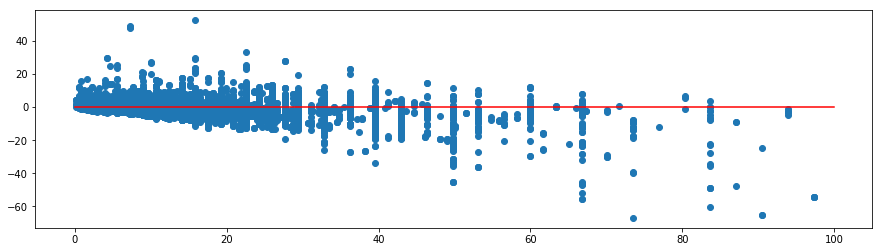

drop col:RoomDir_rank
'the label [RoomDir] is not in the [columns]'
2.421223649097362 
                  fe        im
2           RoomArea  0.174920
0       Neighborhood  0.124674
14         Area/Room  0.114538
25       BusLoc_rank  0.068998
1          TolHeight  0.059658
11         SubwayDis  0.050101
15   AreaSumByHeight  0.047205
19          Rent_pct  0.045757
16  AreaMeanByHeight  0.044092
8             BusLoc  0.034101
18         ab_Height  0.027006
13          TolRooms  0.026716
10         SubwaySta  0.024833
4            Bedroom  0.021286
27    SubwaySta_rank  0.020779
7             Region  0.018462
5           Bathroom  0.017521
24       Region_rank  0.014191
22   Livingroom_rank  0.011439
12         RemodCond  0.009340
17           RoomStr  0.009123
9         SubwayLine  0.008326
3         RentStatus  0.006950
23     Bathroom_rank  0.006226
6           RentType  0.004851
20       Height_rank  0.004127
21      Bedroom_rank  0.002896
26   SubwayLine_rank  0.001882


<Figure size 432x288 with 0 Axes>

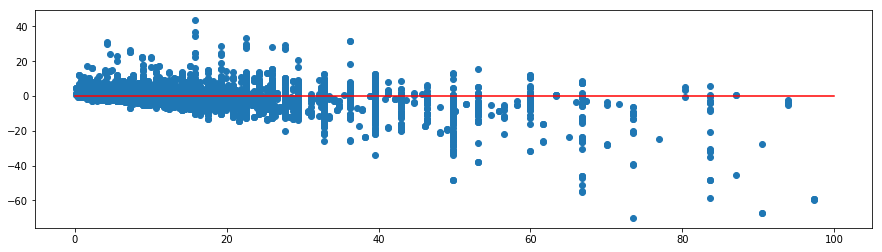

drop col:TolRooms
'the label [RoomDir] is not in the [columns]'
2.4106955397781866 
                  fe        im
2           RoomArea  0.175605
0       Neighborhood  0.122413
14         Area/Room  0.118551
25       BusLoc_rank  0.064777
1          TolHeight  0.059895
11         SubwayDis  0.051953
19          Rent_pct  0.045176
15   AreaSumByHeight  0.043719
8             BusLoc  0.039420
16  AreaMeanByHeight  0.037598
13      RoomDir_rank  0.025357
10         SubwaySta  0.024701
4            Bedroom  0.022297
18         ab_Height  0.021568
27    SubwaySta_rank  0.021568
5           Bathroom  0.021131
7             Region  0.019164
17           RoomStr  0.018508
24       Region_rank  0.013844
12         RemodCond  0.010274
22   Livingroom_rank  0.009400
9         SubwayLine  0.008525
3         RentStatus  0.006558
23     Bathroom_rank  0.005246
6           RentType  0.004299
21      Bedroom_rank  0.004153
20       Height_rank  0.002405
26   SubwayLine_rank  0.001894


<Figure size 432x288 with 0 Axes>

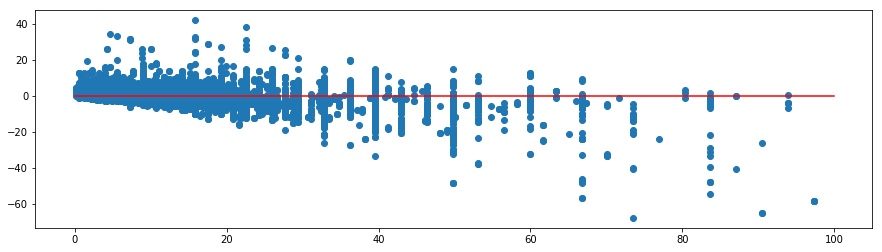

drop col:AreaSumByHeight
'the label [RoomDir] is not in the [columns]'
2.4357537838813283 
                  fe        im
2           RoomArea  0.176977
0       Neighborhood  0.120441
15         Area/Room  0.116355
1          TolHeight  0.071710
25       BusLoc_rank  0.067406
11         SubwayDis  0.050409
19          Rent_pct  0.050044
16  AreaMeanByHeight  0.048950
8             BusLoc  0.038955
10         SubwaySta  0.029034
13      RoomDir_rank  0.025605
18         ab_Height  0.023636
4            Bedroom  0.022979
14          TolRooms  0.021666
27    SubwaySta_rank  0.021447
7             Region  0.018821
5           Bathroom  0.016195
24       Region_rank  0.012183
12         RemodCond  0.010286
22   Livingroom_rank  0.009848
17           RoomStr  0.009775
9         SubwayLine  0.009411
3         RentStatus  0.008097
23     Bathroom_rank  0.007003
20       Height_rank  0.003866
6           RentType  0.003720
21      Bedroom_rank  0.003575
26   SubwayLine_rank  0.001605


<Figure size 432x288 with 0 Axes>

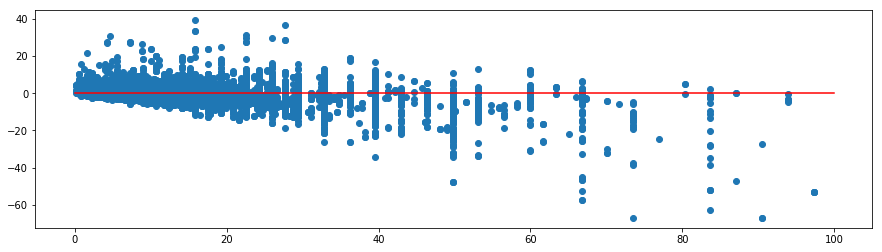

drop col:AreaMeanByHeight
'the label [RoomDir] is not in the [columns]'
2.399398533317782 
                 fe        im
2          RoomArea  0.173212
0      Neighborhood  0.127858
15        Area/Room  0.114889
25      BusLoc_rank  0.067336
1         TolHeight  0.065797
16  AreaSumByHeight  0.053854
11        SubwayDis  0.050484
19         Rent_pct  0.045574
8            BusLoc  0.038394
18        ab_Height  0.025352
14         TolRooms  0.024985
27   SubwaySta_rank  0.023666
4           Bedroom  0.023373
10        SubwaySta  0.023300
13     RoomDir_rank  0.022421
7            Region  0.018831
5          Bathroom  0.018464
24      Region_rank  0.015021
17          RoomStr  0.010771
22  Livingroom_rank  0.010404
12        RemodCond  0.009818
9        SubwayLine  0.009452
3        RentStatus  0.007913
23    Bathroom_rank  0.005935
6          RentType  0.003957
20      Height_rank  0.003517
21     Bedroom_rank  0.003444
26  SubwayLine_rank  0.001978


<Figure size 432x288 with 0 Axes>

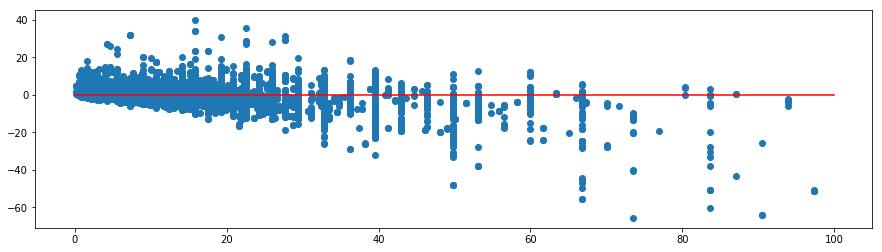

drop col:RoomStr
'the label [RoomDir] is not in the [columns]'
2.399511069290339 
                  fe        im
2           RoomArea  0.172930
0       Neighborhood  0.119265
15         Area/Room  0.113557
25       BusLoc_rank  0.068490
1          TolHeight  0.059595
11         SubwayDis  0.051145
19          Rent_pct  0.044474
17  AreaMeanByHeight  0.043881
16   AreaSumByHeight  0.043807
8             BusLoc  0.038322
14          TolRooms  0.027055
10         SubwaySta  0.024609
27    SubwaySta_rank  0.022459
18         ab_Height  0.021866
4            Bedroom  0.021866
13      RoomDir_rank  0.021718
5           Bathroom  0.018827
7             Region  0.016159
24       Region_rank  0.013713
22   Livingroom_rank  0.012304
12         RemodCond  0.010303
9         SubwayLine  0.008821
3         RentStatus  0.005930
23     Bathroom_rank  0.004966
21      Bedroom_rank  0.004077
6           RentType  0.004003
20       Height_rank  0.003854
26   SubwayLine_rank  0.002001


<Figure size 432x288 with 0 Axes>

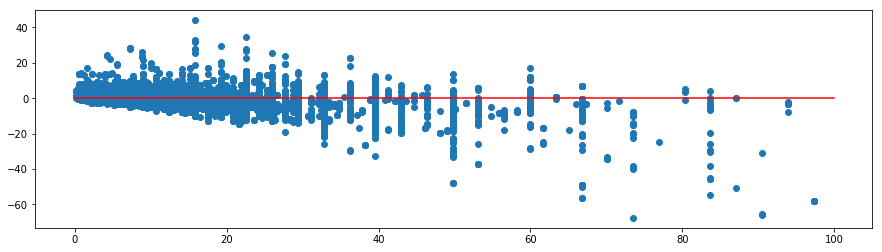

drop col:ab_Height
'the label [RoomDir] is not in the [columns]'
2.385730876436893 
                  fe        im
2           RoomArea  0.169318
0       Neighborhood  0.118472
15         Area/Room  0.114767
25       BusLoc_rank  0.068715
1          TolHeight  0.059926
11         SubwayDis  0.054115
16   AreaSumByHeight  0.047578
19          Rent_pct  0.045398
17  AreaMeanByHeight  0.044091
8             BusLoc  0.036028
10         SubwaySta  0.025496
14          TolRooms  0.024987
13      RoomDir_rank  0.024334
4            Bedroom  0.022663
27    SubwaySta_rank  0.021501
5           Bathroom  0.018740
7             Region  0.017433
24       Region_rank  0.013002
12         RemodCond  0.011114
22   Livingroom_rank  0.010097
18           RoomStr  0.009951
20       Height_rank  0.009152
9         SubwayLine  0.009007
3         RentStatus  0.007336
21      Bedroom_rank  0.005157
23     Bathroom_rank  0.005012
6           RentType  0.004286
26   SubwayLine_rank  0.002324


<Figure size 432x288 with 0 Axes>

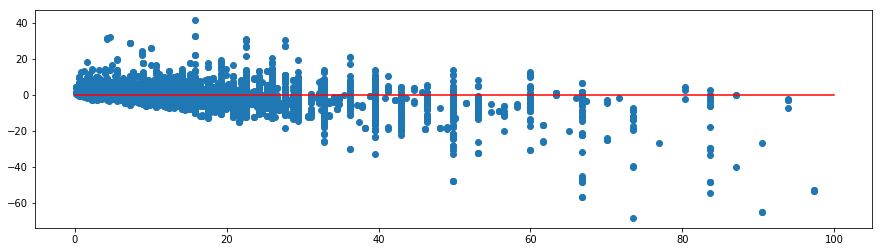

drop col:Rent_pct
'the label [RoomDir] is not in the [columns]'
2.3948010161445654 
                  fe        im
2           RoomArea  0.175517
0       Neighborhood  0.132233
15         Area/Room  0.116838
25       BusLoc_rank  0.072735
1          TolHeight  0.065670
11         SubwayDis  0.050424
16   AreaSumByHeight  0.047970
17  AreaMeanByHeight  0.040830
8             BusLoc  0.039714
10         SubwaySta  0.027294
14          TolRooms  0.023278
27    SubwaySta_rank  0.023278
4            Bedroom  0.022609
19         ab_Height  0.021791
13      RoomDir_rank  0.019857
7             Region  0.019188
5           Bathroom  0.018444
24       Region_rank  0.015023
18           RoomStr  0.010710
12         RemodCond  0.010189
22   Livingroom_rank  0.009520
9         SubwayLine  0.009296
3         RentStatus  0.006917
23     Bathroom_rank  0.005206
6           RentType  0.004611
21      Bedroom_rank  0.004314
20       Height_rank  0.003719
26   SubwayLine_rank  0.002826


<Figure size 432x288 with 0 Axes>

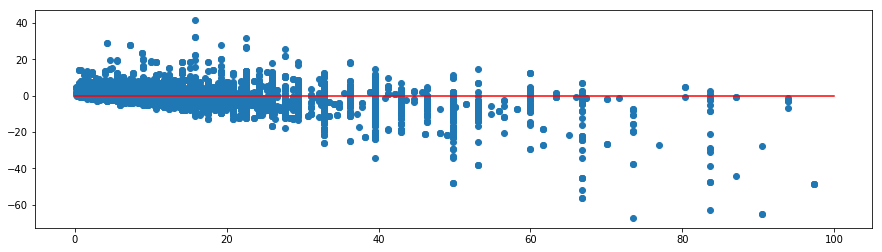

drop col:Height_rank
'the label [RoomDir] is not in the [columns]'
2.3870745338704014 
                  fe        im
2           RoomArea  0.174137
0       Neighborhood  0.115728
15         Area/Room  0.114130
25       BusLoc_rank  0.064511
1          TolHeight  0.057973
11         SubwayDis  0.052161
16   AreaSumByHeight  0.046567
20          Rent_pct  0.046059
17  AreaMeanByHeight  0.042426
8             BusLoc  0.041845
10         SubwaySta  0.026081
19         ab_Height  0.022884
14          TolRooms  0.021867
13      RoomDir_rank  0.021213
27    SubwaySta_rank  0.021213
4            Bedroom  0.020341
7             Region  0.018888
5           Bathroom  0.017072
24       Region_rank  0.013367
9         SubwayLine  0.010316
22   Livingroom_rank  0.009735
18           RoomStr  0.009517
12         RemodCond  0.009372
23     Bathroom_rank  0.006829
3         RentStatus  0.005812
6           RentType  0.003923
21      Bedroom_rank  0.003269
26   SubwayLine_rank  0.002761


<Figure size 432x288 with 0 Axes>

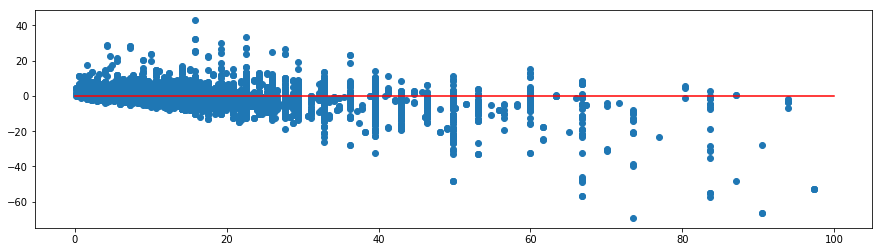

drop col:Bedroom_rank
'the label [RoomDir] is not in the [columns]'
2.4052722884719895 
                  fe        im
2           RoomArea  0.173671
0       Neighborhood  0.117962
15         Area/Room  0.116326
25       BusLoc_rank  0.065303
1          TolHeight  0.056378
11         SubwayDis  0.052361
20          Rent_pct  0.046263
16   AreaSumByHeight  0.042321
17  AreaMeanByHeight  0.042097
8             BusLoc  0.037784
10         SubwaySta  0.025288
14          TolRooms  0.023503
4            Bedroom  0.022834
13      RoomDir_rank  0.022685
19         ab_Height  0.021867
27    SubwaySta_rank  0.021197
7             Region  0.018817
5           Bathroom  0.016809
24       Region_rank  0.014727
18           RoomStr  0.010636
9         SubwayLine  0.010487
22   Livingroom_rank  0.010041
12         RemodCond  0.009669
3         RentStatus  0.007140
23     Bathroom_rank  0.005876
6           RentType  0.003421
26   SubwayLine_rank  0.002306
21       Height_rank  0.002231


<Figure size 432x288 with 0 Axes>

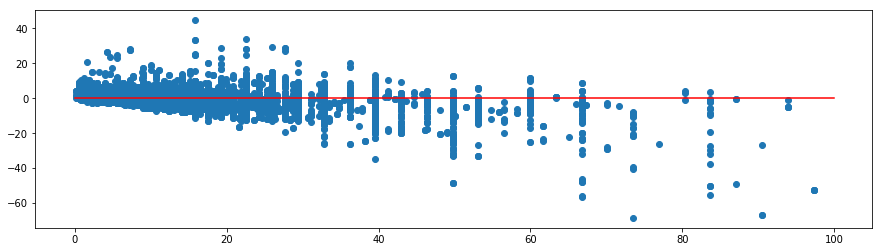

drop col:Livingroom_rank
'the label [RoomDir] is not in the [columns]'
2.4040117578821696 
                  fe        im
2           RoomArea  0.169125
15         Area/Room  0.116124
0       Neighborhood  0.116052
25       BusLoc_rank  0.069270
1          TolHeight  0.058858
11         SubwayDis  0.054230
20          Rent_pct  0.046855
16   AreaSumByHeight  0.046059
17  AreaMeanByHeight  0.039986
8             BusLoc  0.038322
10         SubwaySta  0.024873
19         ab_Height  0.024223
14          TolRooms  0.022993
27    SubwaySta_rank  0.022993
13      RoomDir_rank  0.022560
4            Bedroom  0.020824
7             Region  0.018727
5           Bathroom  0.016631
24       Region_rank  0.014172
18           RoomStr  0.013955
12         RemodCond  0.009255
9         SubwayLine  0.009255
3         RentStatus  0.006074
23     Bathroom_rank  0.005423
6           RentType  0.004483
22      Bedroom_rank  0.003905
26   SubwayLine_rank  0.002748
21       Height_rank  0.002025


<Figure size 432x288 with 0 Axes>

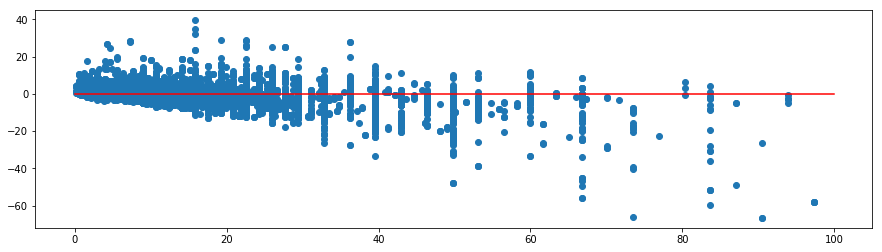

drop col:Bathroom_rank
'the label [RoomDir] is not in the [columns]'
2.393683133110994 
                  fe        im
2           RoomArea  0.171347
0       Neighborhood  0.114816
15         Area/Room  0.114158
25       BusLoc_rank  0.069329
1          TolHeight  0.057774
11         SubwayDis  0.050607
16   AreaSumByHeight  0.048340
20          Rent_pct  0.045195
17  AreaMeanByHeight  0.041466
8             BusLoc  0.036200
10         SubwaySta  0.024572
19         ab_Height  0.023475
14          TolRooms  0.022671
27    SubwaySta_rank  0.022598
4            Bedroom  0.022159
5           Bathroom  0.021866
13      RoomDir_rank  0.021501
7             Region  0.017478
24       Region_rank  0.014846
23   Livingroom_rank  0.010458
12         RemodCond  0.009653
9         SubwayLine  0.009653
18           RoomStr  0.008703
3         RentStatus  0.007094
22      Bedroom_rank  0.004315
6           RentType  0.004168
21       Height_rank  0.002998
26   SubwayLine_rank  0.002560


<Figure size 432x288 with 0 Axes>

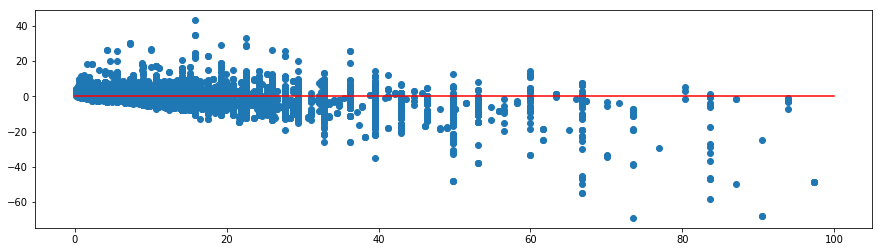

drop col:Region_rank
'the label [RoomDir] is not in the [columns]'
2.419447704240404 
                  fe        im
2           RoomArea  0.168696
0       Neighborhood  0.118831
15         Area/Room  0.116279
25       BusLoc_rank  0.068309
1          TolHeight  0.059634
11         SubwayDis  0.050667
20          Rent_pct  0.047314
16   AreaSumByHeight  0.043231
8             BusLoc  0.040023
17  AreaMeanByHeight  0.038784
10         SubwaySta  0.026172
27    SubwaySta_rank  0.024568
4            Bedroom  0.024276
7             Region  0.023693
14          TolRooms  0.023256
13      RoomDir_rank  0.022454
19         ab_Height  0.021433
5           Bathroom  0.018007
12         RemodCond  0.010279
9         SubwayLine  0.010206
18           RoomStr  0.009769
23   Livingroom_rank  0.008748
3         RentStatus  0.005832
24     Bathroom_rank  0.005541
21       Height_rank  0.004228
22      Bedroom_rank  0.003791
6           RentType  0.003426
26   SubwayLine_rank  0.002552


<Figure size 432x288 with 0 Axes>

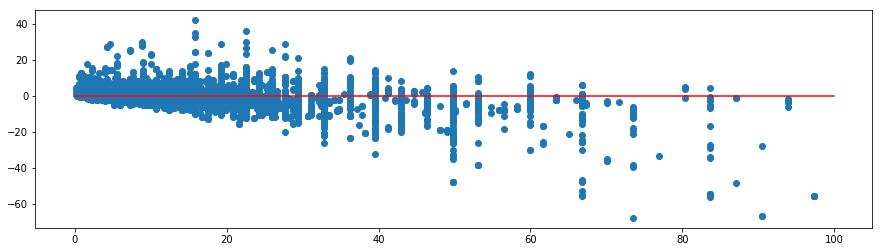

drop col:BusLoc_rank
'the label [RoomDir] is not in the [columns]'
2.4392089240420374 
                  fe        im
2           RoomArea  0.169994
0       Neighborhood  0.126567
15         Area/Room  0.104270
8             BusLoc  0.071481
1          TolHeight  0.063320
11         SubwayDis  0.050641
16   AreaSumByHeight  0.047071
20          Rent_pct  0.046196
17  AreaMeanByHeight  0.036870
27    SubwaySta_rank  0.035048
25       Region_rank  0.030530
7             Region  0.023535
14          TolRooms  0.022807
10         SubwaySta  0.022442
19         ab_Height  0.022078
13      RoomDir_rank  0.020402
4            Bedroom  0.019455
5           Bathroom  0.018581
12         RemodCond  0.011221
23   Livingroom_rank  0.010711
9         SubwayLine  0.010055
18           RoomStr  0.008962
22      Bedroom_rank  0.006048
24     Bathroom_rank  0.005829
3         RentStatus  0.005611
6           RentType  0.004445
26   SubwayLine_rank  0.003279
21       Height_rank  0.002550


<Figure size 432x288 with 0 Axes>

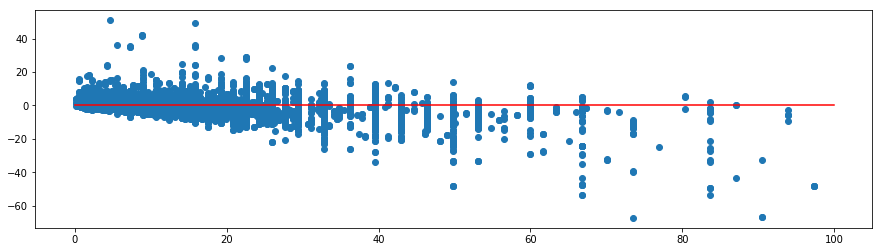

drop col:SubwayLine_rank
'the label [RoomDir] is not in the [columns]'
2.3886842510270916 
                  fe        im
2           RoomArea  0.167728
0       Neighborhood  0.120893
15         Area/Room  0.113868
26       BusLoc_rank  0.068643
1          TolHeight  0.057958
11         SubwayDis  0.051518
16   AreaSumByHeight  0.046323
17  AreaMeanByHeight  0.044420
20          Rent_pct  0.043030
8             BusLoc  0.035931
10         SubwaySta  0.025174
27    SubwaySta_rank  0.023344
13      RoomDir_rank  0.022978
14          TolRooms  0.022686
19         ab_Height  0.022027
4            Bedroom  0.021734
7             Region  0.017929
5           Bathroom  0.016612
25       Region_rank  0.015002
18           RoomStr  0.010465
23   Livingroom_rank  0.010245
9         SubwayLine  0.010099
12         RemodCond  0.009733
3         RentStatus  0.006659
24     Bathroom_rank  0.005488
6           RentType  0.003659
21       Height_rank  0.003439
22      Bedroom_rank  0.002415


<Figure size 432x288 with 0 Axes>

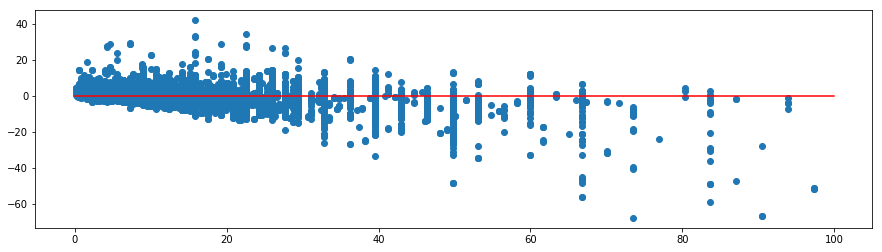

drop col:SubwaySta_rank
'the label [RoomDir] is not in the [columns]'
2.419782884012749 
                  fe        im
2           RoomArea  0.170511
0       Neighborhood  0.125182
15         Area/Room  0.117591
26       BusLoc_rank  0.074599
1          TolHeight  0.060803
11         SubwayDis  0.055255
16   AreaSumByHeight  0.044891
20          Rent_pct  0.043577
17  AreaMeanByHeight  0.038978
8             BusLoc  0.036934
10         SubwaySta  0.027664
19         ab_Height  0.023431
13      RoomDir_rank  0.022263
14          TolRooms  0.022263
4            Bedroom  0.021314
5           Bathroom  0.018321
7             Region  0.017956
25       Region_rank  0.015255
9         SubwayLine  0.010365
23   Livingroom_rank  0.009927
12         RemodCond  0.009562
18           RoomStr  0.008321
3         RentStatus  0.006934
24     Bathroom_rank  0.005620
22      Bedroom_rank  0.004015
6           RentType  0.003869
21       Height_rank  0.002482
27   SubwayLine_rank  0.002117


<Figure size 432x288 with 0 Axes>

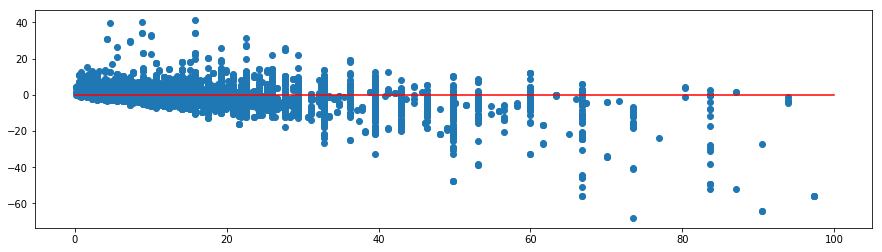

In [7]:
def xgb_eval(train_df,val_df):
    train_df=train_df.copy()
    val_df=val_df.copy()

    try:
        from sklearn.preprocessing import LabelEncoder
        lb_encoder=LabelEncoder()
        lb_encoder.fit(train_df.loc[:,'RoomDir'].append(val_df.loc[:,'RoomDir']))
        train_df.loc[:,'RoomDir']=lb_encoder.transform(train_df.loc[:,'RoomDir'])
        val_df.loc[:,'RoomDir']=lb_encoder.transform(val_df.loc[:,'RoomDir'])
    except Exception as e:
        print(e)

    import xgboost as xgb
    X_train=train_df.drop(['Rental'],axis=1)
    Y_train=train_df.loc[:,'Rental'].values
    X_val=val_df.drop(['Rental'],axis=1)
    Y_val=val_df.loc[:,'Rental'].values

    from sklearn.metrics import mean_squared_error

    try:
        eval_df=val_df.copy().drop('Time',axis=1)
    except Exception as e:
        eval_df=val_df.copy()

    reg_model=xgb.XGBRegressor(max_depth=5,n_estimators=500,n_jobs=-1)
    reg_model.fit(X_train,Y_train)

    y_pred=reg_model.predict(X_val)
    print(np.sqrt(mean_squared_error(Y_val,y_pred)),end=' ')

    eval_df.loc[:,'Y_pred']=y_pred
    eval_df.loc[:,'RE']=eval_df.loc[:,'Y_pred']-eval_df.loc[:,'Rental']
    
    print('')
    feature=X_train.columns
    fe_im=reg_model.feature_importances_
    print(pd.DataFrame({'fe':feature,'im':fe_im}).sort_values(by='im',ascending=False))

    import matplotlib.pyplot as plt
    plt.clf()
    plt.figure(figsize=(15,4))
    plt.plot([Y_train.min(),Y_train.max()],[0,0],color='red')
    plt.scatter(x=eval_df.loc[:,'Rental'],y=eval_df.loc[:,'RE'])
    plt.show()

    return eval_df

# dep5,est500:2.3769
# dep6,est500:2.2755
# dep7,est1768:2.0344
# dep8,est1036:1.999
# dep9,est680:2.0466

train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_df=train_data[train_data.loc[:,'Time']<3]
val_df=train_data[train_data.loc[:,'Time']==3]

tmp_train_df=train_df.copy()
tmp_val_df=val_df.copy()

def ex_dir(direction):
    try:
        direction=direction.split(' ')[0]
    except Exception as e:
        pass
    return direction
tmp_train_df.loc[:,'RoomDir']=train_df.loc[:,'RoomDir'].apply(ex_dir)
tmp_val_df.loc[:,'RoomDir']=val_df.loc[:,'RoomDir'].apply(ex_dir)
rank_df=tmp_train_df.loc[:,['RoomDir','Rental']].groupby('RoomDir',as_index=False).mean().sort_values(by='Rental').reset_index(drop=True)
rank_df.loc[:,'RoomDir'+'_rank']=rank_df.index+1
rank_fe_df=rank_df.drop(['Rental'],axis=1)
tmp_train_df=tmp_train_df.merge(rank_fe_df,how='left',on='RoomDir')
tmp_val_df=tmp_val_df.merge(rank_fe_df,how='left',on='RoomDir')
tmp_train_df.drop(['RoomDir'],axis=1,inplace=True)
tmp_val_df.drop(['RoomDir'],axis=1,inplace=True)

tmp_train_df.loc[:,'TolRooms']=tmp_train_df.loc[:,'Livingroom']+tmp_train_df.loc[:,'Bedroom']+tmp_train_df.loc[:,'Bathroom']
tmp_val_df.loc[:,'TolRooms']=tmp_val_df.loc[:,'Livingroom']+tmp_val_df.loc[:,'Bedroom']+tmp_val_df.loc[:,'Bathroom']
tmp_train_df.loc[:,'Area/Room']=tmp_train_df.loc[:,'RoomArea']/(tmp_train_df.loc[:,'TolRooms']+1)
tmp_val_df.loc[:,'Area/Room']=tmp_val_df.loc[:,'RoomArea']/(tmp_val_df.loc[:,'TolRooms']+1)

tmp_train_df.loc[:,'Area/Bedroom']=tmp_train_df.loc[:,'RoomArea']/tmp_train_df.loc[:,'Bedroom']
tmp_val_df.loc[:,'Area/Bedroom']=tmp_val_df.loc[:,'RoomArea']/tmp_train_df.loc[:,'Bedroom']
tmp_train_df.loc[:,'Area/Bathroom']=tmp_train_df.loc[:,'RoomArea']/tmp_train_df.loc[:,'Bathroom']
tmp_val_df.loc[:,'Area/Bathroom']=tmp_val_df.loc[:,'RoomArea']/tmp_train_df.loc[:,'Bathroom']
tmp_train_df.loc[:,'Area/Livingroom']=tmp_train_df.loc[:,'RoomArea']/tmp_train_df.loc[:,'Livingroom']
tmp_val_df.loc[:,'Area/Livingroom']=tmp_val_df.loc[:,'RoomArea']/tmp_train_df.loc[:,'Livingroom']
tmp_train_df.loc[:,'OtherArea']=tmp_train_df.loc[:,'RoomArea']-tmp_train_df.loc[:,'Area/Bedroom']-tmp_train_df.loc[:,'Area/Bathroom']-tmp_train_df.loc[:,'Area/Livingroom']
tmp_val_df.loc[:,'OtherArea']=tmp_val_df.loc[:,'RoomArea']-tmp_val_df.loc[:,'Area/Bedroom']-tmp_val_df.loc[:,'Area/Bathroom']-tmp_val_df.loc[:,'Area/Livingroom']

tmp_df=tmp_train_df.loc[:,['Height','TolHeight','RoomArea']].groupby(['TolHeight','Height'],as_index=False).sum()
tmp_df.rename(columns={'RoomArea':'AreaSumByHeight'},inplace=True)
tmp_train_df=tmp_train_df.merge(tmp_df,how='left',on=['TolHeight','Height'])
tmp_val_df=tmp_val_df.merge(tmp_df,how='left',on=['TolHeight','Height'])
tmp_df=tmp_train_df.loc[:,['Height','TolHeight','RoomArea']].groupby(['TolHeight','Height'],as_index=False).mean()
tmp_df.rename(columns={'RoomArea':'AreaMeanByHeight'},inplace=True)
tmp_train_df=tmp_train_df.merge(tmp_df,how='left',on=['TolHeight','Height'])
tmp_val_df=tmp_val_df.merge(tmp_df,how='left',on=['TolHeight','Height'])

tmp_train_df.loc[:,'RoomStr']=tmp_train_df.loc[:,'Bedroom']+tmp_train_df.loc[:,'Livingroom']
tmp_val_df.loc[:,'RoomStr']=tmp_val_df.loc[:,'Bedroom']+tmp_val_df.loc[:,'Livingroom']

tmp_train_df.loc[:,'ab_Height']=tmp_train_df.loc[:,'Height']/(tmp_train_df.loc[:,'TolHeight']+1)
tmp_val_df.loc[:,'ab_Height']=tmp_val_df.loc[:,'Height']/(tmp_val_df.loc[:,'TolHeight']+1)

tmp_train_df.loc[:,'Rent_pct']=tmp_train_df.loc[:,'RentRoom']/((tmp_train_df.loc[:,'TolHeight']+1))
tmp_val_df.loc[:,'Rent_pct']=tmp_val_df.loc[:,'RentRoom']/((tmp_val_df.loc[:,'TolHeight']+1))

rank_cols=['Height','TolHeight','Bedroom','Livingroom','Bathroom',
           'RentType','Region','BusLoc','SubwayLine','SubwaySta','RemodCond']
for col in rank_cols:
    if col!='Rental':
        rank_df=train_df.loc[:,[col,'Rental']].groupby(col,as_index=False).mean().sort_values(by='Rental').reset_index(drop=True)
        rank_df.loc[:,col+'_rank']=rank_df.index+1        # +1，为缺失值预留一个0值的rank
        rank_fe_df=rank_df.drop(['Rental'],axis=1)
        tmp_train_df=tmp_train_df.merge(rank_fe_df,how='left',on=col)
        tmp_val_df=tmp_val_df.merge(rank_fe_df,how='left',on=col)

drop_cols=['Time','Area/Bedroom','OtherArea','TolHeight_rank','Height',
           'Area/Livingroom','Area/Bathroom','RentRoom','RemodCond_rank','Livingroom',
           'RentType_rank']
tmp_train_df.drop(drop_cols,axis=1,inplace=True)
tmp_val_df.drop(drop_cols,axis=1,inplace=True)

# 贪心策略减特征，目前为：2.377
for col in tmp_train_df.columns:
    if col not in ['Rental','RoomArea','Neighborhood','Area/Room']:
        print('drop col:{}'.format(col))
        eval_df=xgb_eval(train_df=tmp_train_df.drop([col],axis=1),val_df=tmp_val_df.drop([col],axis=1))

## 预测

In [ ]:
def xgb_pred(train_df,test_df):
    train_df=pd.read_csv('train.csv')
    test_df=pd.read_csv('test.csv')

    try:
        from sklearn.preprocessing import LabelEncoder
        lb_encoder=LabelEncoder()
        lb_encoder.fit(train_df.loc[:,'RoomDir'].append(test_df.loc[:,'RoomDir']))
        train_df.loc[:,'RoomDir']=lb_encoder.transform(train_df.loc[:,'RoomDir'])
        test_df.loc[:,'RoomDir']=lb_encoder.transform(test_df.loc[:,'RoomDir'])
    except Exception as e:
        print(e)

    import xgboost as xgb
    X_train=train_df.drop(['Rental'],axis=1)
    Y_train=train_df.loc[:,'Rental'].values
    test_id=test_df.loc[:,'id']
    X_test=test_df.drop(['id'],axis=1)

    from sklearn.metrics import mean_squared_error

    reg_model=xgb.XGBRegressor(max_depth=8,learning_rate=0.1,n_estimators=1000,
                               subsample=0.9,colsample_bytree=0.9, colsample_bylevel=0.9,
                               reg_alpha=0.3, reg_lambda=0.7,n_jobs=-1)
    reg_model.fit(X_train,Y_train,eval_set=[(X_train,Y_train)],verbose=100,early_stopping_rounds=10)

    y_pred=reg_model.predict(X_test)

    sub_df=pd.DataFrame({
        'id':test_id,
        'price':y_pred
    })
    sub_df.to_csv('sub.csv',index=False)

    return None